# All together

- Logistic
- k-NN
- Random Forest

Benchmark entre ellos y competición por equipos

In [ ]:
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   #
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")
state = pd.get_dummies(df['State'],drop_first=False)


# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan','State'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip,state],axis=1)



In [ ]:
df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,0,0,0,0,0,0,0,0,0,0


# Creación de nuevas variables

- Considera crear nuevas variables:



1.   Puedes utilizar las del ejercicio 1
2.   Puedes utilizar kmeans o PCA
3. Puedes utilizar variables que se te ocurran visualizando los datos o pensando en el problema



In [ ]:
# New variables
df.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,0,0


# Separación de train y test


In [ ]:
# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101)

In [ ]:
X_test.shape

(834, 69)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

**Logistic Regression**

In [ ]:
random.seed(113)
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [ ]:
print(scores['test_roc_auc'].shape)
scores['test_roc_auc']

(20,)


array([0.65732087, 0.775571  , 0.70158888, 0.68917577, 0.77308838,
       0.73684211, 0.80784508, 0.68073486, 0.69165839, 0.84011917,
       0.73982125, 0.69314796, 0.6693148 , 0.78252234, 0.80983118,
       0.80685204, 0.65690169, 0.76266137, 0.69414101, 0.62264151])

**Random Forest**



In [ ]:
random_forest = RandomForestClassifier(random_state = random.seed(113))

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

**k-NN**

In [ ]:
random.seed(113)
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Fitting time': [LR_fit_time, forest_fit_time, KNN_fit_time],
    'Scoring time': [LR_score_time, forest_score_time, KNN_score_time],
    'Accuracy'    : [LR_accuracy, forest_accuracy, KNN_accuracy],
    'Precision'   : [LR_precision, forest_precision, KNN_precision],
    'Recall'      : [LR_recall, forest_recall, KNN_recall],
    'F1_score'    : [LR_f1, forest_f1, KNN_f1],
    'AUC_ROC'     : [LR_roc, forest_roc, KNN_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Random Forest,1.239969,0.058191,0.935971,0.944407,0.801119,0.929425,0.907669
2,K-Nearest Neighbors,0.006444,0.033749,0.865561,0.761545,0.612085,0.838005,0.678947
0,Logistic Regression,0.244699,0.055503,0.849926,0.705854,0.533254,0.799300,0.729589


In [ ]:
print(max(models_initial['AUC_ROC']))

0.9076687099957617


# Predicción en test

In [ ]:
#Modelado
## ¿Podrías intentar mejorar el modelo actual creando nuevas variables?
## ¿Que equipo tendrá mejor AUC?

# Cargamos
df = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/jimena/datasets/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   #
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")

# Quitamos columna State.
# TO DO: ¿Alguna idea para ahora?
df.drop('State',axis=1,inplace=True)

# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip],axis=1)

# TO DO: ¿Podemos crear más variables?


# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1),
                                                    df['Churn'], test_size=0.25,
                                                    random_state=101)



## Ejercicio

Modifica los hyperparametros para maximizar tu AUC
- `max_depth`
- `max_features`

Modifica en el grafico el `:1` por `:0`

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
# Importamos el modelo y entrenamos
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
rf_mod = RandomForestClassifier()
#rf_mod = RandomForestClassifier(max_depth=, max_features = )
rf_mod.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pres_test = rf_mod.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pres_test[:,1])
print('Team AUC:', roc_auc)

Team AUC: 0.8969233784048599


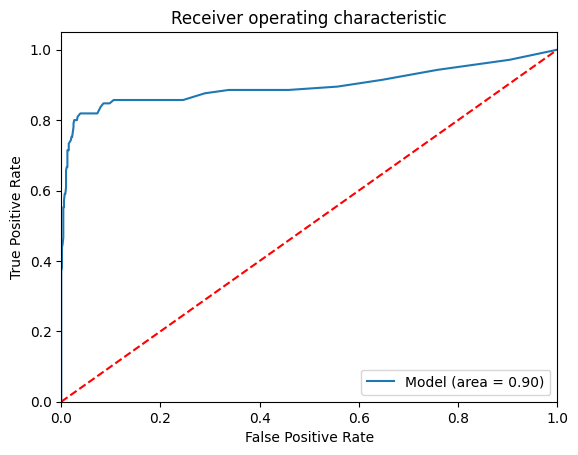

In [ ]:
from sklearn.metrics import roc_curve
# Modifica en el gráfico el 1 por el 0
fpr, tpr, thresholds = roc_curve(y_test, pres_test[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('Team AUC:', roc_auc)

Team AUC: 0.8969233784048599
